In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
num_neurons = 100
g = 0.1

total_steps = 1000
time_step = 0.1

potentail_arr = np.zeros(num_neurons)
random_input = np.random.uniform(size = num_neurons)

In [3]:
spiking_records = np.array( np.zeros((total_steps,num_neurons)), dtype = bool )
spiking_records[0].shape

(100,)

In [4]:
np.sum(spiking_records,axis = 1).shape

(1000,)

In [5]:
for i in tqdm( range(total_steps) ):
    potentail_arr += (random_input - potentail_arr)*time_step - g*num_neurons*np.sum(spiking_records[i])
    spiking_records[i] = potentail_arr > 1
    if True in spiking_records[i]: break
    reset_func = lambda v: 0 if v>1 else v
    vfunc = np.vectorize(reset_func)
#     potentail_arr = vfunc(potentail_arr)

100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 10262.68it/s]


(array([ 6.,  6.,  8.,  9.,  9., 16.,  8., 15., 12., 11.]),
 array([0.00627664, 0.10525877, 0.2042409 , 0.30322302, 0.40220515,
        0.50118728, 0.60016941, 0.69915153, 0.79813366, 0.89711579,
        0.99609792]),
 <a list of 10 Patch objects>)

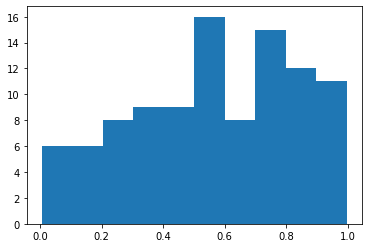

In [6]:
plt.hist(potentail_arr)

In [7]:
True in spiking_records

False